In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import ipdb

In [3]:
# Load Month csv comments
path = '../csv/'
files = [f for f in glob.glob(path + "/RC_2006-01.csv", recursive=True)]
authors_date = []
comments_date = []
for file in files:
    df = pd.read_csv(file)
    comments_per_user = df.groupby('author')
    ipdb.set_trace()
    #authors = df['author'].drop_duplicates()
    #comments = df['comment']
    #temp_df = pd.DataFrame({'author': authors})
    #comment_df = pd.DataFrame({'author': comments})
    #authors_date = authors_date.append(temp_df, ignore_index = True)
    #comments_date = comments_date.append(comment_df, ignore_index = True)

> <ipython-input-3-2f924d0471d0>(6)<module>()
      5 comments_date = []
----> 6 for file in files:
      7     df = pd.read_csv(file)

ipdb> df.groupby('author')
ipdb> comments_per_user = df['comments'].groupby('author')
*** KeyError: 'comments'
ipdb> comments_per_user = df['comment'].groupby('author')
*** KeyError: 'author'
ipdb> comments_per_user = df.groupby('author')
ipdb> comments_per_user.count
<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fcd6ae73cf8>>
ipdb> ()
()
ipdb> comments_per_user.count()
           Unnamed: 0  id  subreddit  date  comment  char_count  word_count  \
author                                                                        
115909              1   1          1     1        1           1           1   
59ideas             2   2          2     2        2           2           2   
AaronSw            15  15         15    15       15          15          15   
AllInOne            1   1          1     1 

BdbQuit: 

author dataset_date
0                  cmkay   RC_2007-06
1          procrastitron   RC_2007-06
2            nickburlett   RC_2007-06
3           antifolkhero   RC_2007-06
4                  jpark   RC_2007-06
...                  ...          ...
450794        Rhole_1983   RC_2008-09
450795               ffi   RC_2008-09
450796  godgavemeafacial   RC_2008-09
450797         javaman47   RC_2008-09
450798         xolusmojo   RC_2008-09

[450799 rows x 2 columns]

In [20]:
dates = [file.split('/')[-1].split('.csv')[0] for file in files]



In [22]:
authors_group = authors_date.groupby('author')

In [60]:
# Users who has comments all months from 2006 to 2008
users_of_all_months = authors_group.count().query('dataset_date == 36')
users_of_all_months_name = list(users_of_all_months.to_dict()['dataset_date'].keys())
users_of_all_months_name.remove('[deleted]')

In [62]:
#df = pd.read_csv(files[0])
#df.loc[df['author'].isin(users_of_all_months_name)]

In [63]:
series_authors_date = pd.DataFrame(columns=['author', 'comment', 'char_count', 'word_count'])
for file in files:
    df = pd.read_csv(file)
    temp_df = df.loc[df['author'].isin(users_of_all_months_name)]
    series_authors_date = series_authors_date.append(temp_df, ignore_index = True)

/home/guilhermecasimiro/SI-Folder/Mestrado/Experimento/.venv/lib/python3.6/site-packages/pandas/core/frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [92]:
series_users_group = series_authors_date.groupby('author').count()['Comments count']
#series_users_group.rename( columns={'Unnamed: 0':'Comments count'}, inplace=True )


In [123]:
comments = series_users_group.to_list()

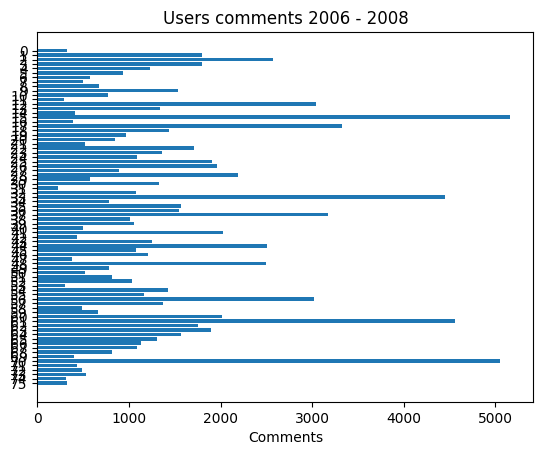

In [127]:
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(users_of_all_months_name))

ax.barh(y_pos, comments, align='center')
ax.set_yticks(y_pos)
#ax.set_yticklabels(users_of_all_months_name)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Comments')
ax.set_title('Users comments 2006 - 2008')

plt.show()